# Statistics
### Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Load data

In [2]:
games_df = pd.read_json("data/games.json")

In [3]:
runs_df = None
for id in games_df["id"].values:
    try:
        run_df = pd.read_json("data/runs/{}.json".format(id))
    except Exception:
        continue
    if runs_df is None:
        runs_df = run_df
    else:
        runs_df = pd.concat([runs_df, run_df], ignore_index=True)

In [4]:
runs_df_raw = runs_df
runs_df

,id,game,player,player_location,time,category,region,platform,emulated
0,yl9lpnxy,'Splosion Man,SuperBigKMart,ca/qc,8609.0,Single Player,USA / NTSC,Xbox 360,False
1,yvg8v1oy,'Splosion Man,aychar,gb/eng,47.0,Single Player,None,Xbox 360,False
2,meke762m,'Splosion Man,BULBOUS1980,None,60.0,Single Player,None,Xbox 360,False
3,mrqo148y,'Splosion Man,MilsTailsPrower,fr,52.0,Single Player,EUR / PAL,Xbox 360,False
4,y45gr22m,'Splosion Man,Raigeki,None,65.0,Single Player,None,Xbox 360,False
...,...,...,...,...,...,...,...,...,...
166421,yorlwdjy,Wii Music,laneland,us,1218.0,Pitch Perfect,USA / NTSC,Wii,False
166422,yordqxdy,Wii Music,Eight_,us,1157.4,Pitch Perfect,USA / NTSC,Wii U,False
166423,yvr07woz,Wii Music,SMMidi,gb/eng,1493.0,Pitch Perfect,EUR / PAL,Wii U,False
166424,me1ldw9y,Wii Music,MrMoffattPlayz,us,7330.0,"""September"" All Genres",USA / NTSC,Wii,False


In [5]:
drop_high = runs_df_raw['time'].quantile(q = 0.99)
drop_low = runs_df_raw['time'].quantile(q = 0.01)

runs_df = runs_df_raw[runs_df_raw['time'] > drop_low]
runs_df = runs_df_raw[runs_df_raw['time'] < drop_high]
runs_df = runs_df_raw.dropna(subset = ['region'])#.reset_index(drop=True)

for game in runs_df["game"].unique():
    if not (((runs_df["game"] == game) & (runs_df["region"] == "JPN / NTSC")).any() and ((runs_df["game"] == game) & (runs_df["region"] != "JPN / NTSC")).any()):
        runs_df = runs_df[runs_df["game"] != game]

In [6]:
runs_df

,id,game,player,player_location,time,category,region,platform,emulated
11,wzp87exy,(The) Final Fantasy Legend,Poxnor,None,406.0,Any %,JPN / NTSC,None,False
12,y99d3wny,(The) Final Fantasy Legend,baku_zero,jp,79.0,Any %,JPN / NTSC,Super Game Boy 2,False
13,y65ggwqz,(The) Final Fantasy Legend,gossyo,jp,80.0,Any %,JPN / NTSC,Super Game Boy 2,False
14,zxn42pem,(The) Final Fantasy Legend,gyre,None,3335.0,Any % (Glitchless),USA / NTSC,Game Boy Player,False
15,yodel6dm,(The) Final Fantasy Legend,RuneGlazeDonut,ca,98.0,Any %,JPN / NTSC,Super Game Boy,True
...,...,...,...,...,...,...,...,...,...
166421,yorlwdjy,Wii Music,laneland,us,1218.0,Pitch Perfect,USA / NTSC,Wii,False
166422,yordqxdy,Wii Music,Eight_,us,1157.4,Pitch Perfect,USA / NTSC,Wii U,False
166423,yvr07woz,Wii Music,SMMidi,gb/eng,1493.0,Pitch Perfect,EUR / PAL,Wii U,False
166424,me1ldw9y,Wii Music,MrMoffattPlayz,us,7330.0,"""September"" All Genres",USA / NTSC,Wii,False


In [7]:
def transform_categorical(target_df, source_df, column_name):
    mapping = source_df[column_name].unique()
    for i in range(0, len(mapping)):
        target_df.loc[ target_df[column_name] == mapping[i], column_name] = i
    target_df[column_name] = target_df[column_name].astype(float)

In [8]:
runs_ordinals_df = runs_df
transform_categorical(runs_ordinals_df, runs_df, "region")
transform_categorical(runs_ordinals_df, runs_df, "player_location")
transform_categorical(runs_ordinals_df, runs_df, "game")
transform_categorical(runs_ordinals_df, runs_df, "platform")
transform_categorical(runs_ordinals_df, runs_df, "category")

In [9]:
runs_ordinals_df

,id,game,player,player_location,time,category,region,platform,emulated
11,wzp87exy,0.0,Poxnor,NaN,406.0,0.0,0.0,NaN,False
12,y99d3wny,0.0,baku_zero,1.0,79.0,0.0,0.0,1.0,False
13,y65ggwqz,0.0,gossyo,1.0,80.0,0.0,0.0,1.0,False
14,zxn42pem,0.0,gyre,NaN,3335.0,1.0,1.0,2.0,False
15,yodel6dm,0.0,RuneGlazeDonut,2.0,98.0,0.0,0.0,3.0,True
...,...,...,...,...,...,...,...,...,...
166421,yorlwdjy,2289.0,laneland,5.0,1218.0,4524.0,1.0,10.0,False
166422,yordqxdy,2289.0,Eight_,5.0,1157.4,4524.0,1.0,35.0,False
166423,yvr07woz,2289.0,SMMidi,3.0,1493.0,4524.0,2.0,35.0,False
166424,me1ldw9y,2289.0,MrMoffattPlayz,5.0,7330.0,4526.0,1.0,10.0,False


C:\Users\chova\AppData\Local\Temp\ipykernel_5252\2637055959.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(runs_ordinals_df.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

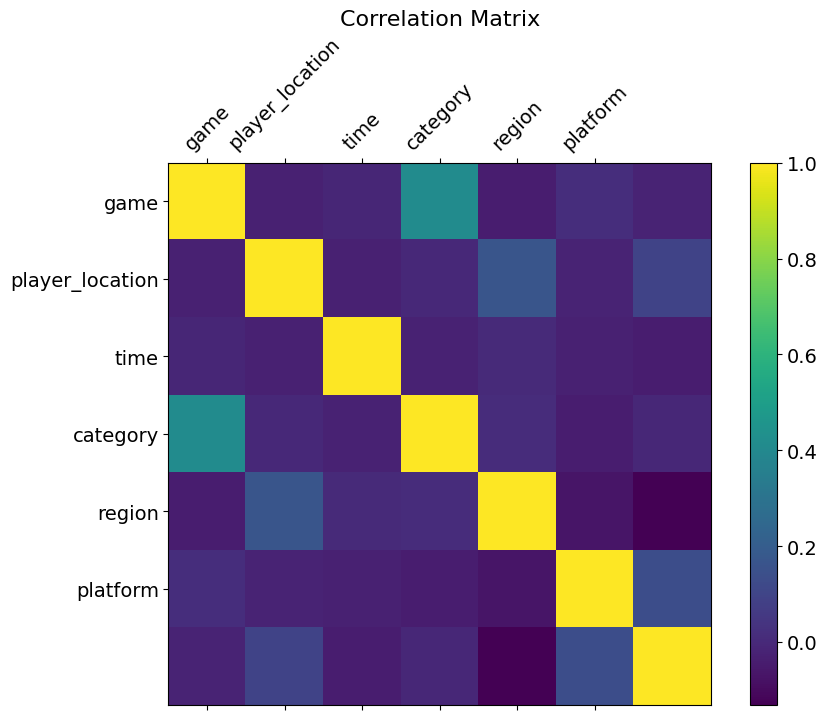

In [10]:
f = plt.figure(figsize=(10, 7))
plt.matshow(runs_ordinals_df.corr(), fignum=f.number)
plt.xticks(range(runs_ordinals_df.select_dtypes(['number']).shape[1]), runs_ordinals_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(runs_ordinals_df.select_dtypes(['number']).shape[1]), runs_ordinals_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [11]:
corr = runs_ordinals_df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\chova\AppData\Local\Temp\ipykernel_5252\184095770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = runs_ordinals_df.corr()


,game,player_location,time,category,region,platform,emulated
game,1.000000,-0.026061,-0.010051,0.415987,-0.042150,0.015729,-0.019443
player_location,-0.026061,1.000000,-0.026760,0.001014,0.165056,-0.020313,0.094471
time,-0.010051,-0.026760,1.000000,-0.023345,0.001577,-0.025470,-0.042253
category,0.415987,0.001014,-0.023345,1.000000,0.014008,-0.040123,-0.005906
region,-0.042150,0.165056,0.001577,0.014008,1.000000,-0.068933,-0.131282
platform,0.015729,-0.020313,-0.025470,-0.040123,-0.068933,1.000000,0.136895
emulated,-0.019443,0.094471,-0.042253,-0.005906,-0.131282,0.136895,1.000000
